In [3]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend as K
tf.compat.v1.experimental.output_all_intermediates(True)

In [4]:
tf.random.set_seed(36)

## Dataset

In [5]:
BASE_DIR_PATH = '../Datasets'
DATASET_FILE = os.path.join(BASE_DIR_PATH, '2016_2017_sto_nino_and_montalban.csv')

In [6]:
df = pd.read_csv(DATASET_FILE)
df

,Unnamed: 0,datetime,month,day,hour,t,Station,x,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope
0,0,2016-01-01 00:00:00,1,1,0,0.0,Montalban,0,0,1,2,0,0,21.03,14.842428,630.90,0.023526,0.035,0.002000
1,1,2016-01-01 00:00:00,1,1,0,0.0,Sto_Nino,14420,0,1,2,0,0,12.18,21.033407,803.88,0.026165,0.033,0.000667
2,2,2016-01-01 01:00:00,1,1,1,3600.0,Montalban,0,0,1,1,1,0,21.03,14.842428,630.90,0.023526,0.035,0.002000
3,3,2016-01-01 01:00:00,1,1,1,3600.0,Sto_Nino,14420,0,1,1,1,0,12.19,21.280072,804.54,0.026450,0.033,0.000667
4,4,2016-01-01 02:00:00,1,1,2,7200.0,Montalban,0,1,1,1,0,1,21.03,14.842428,630.90,0.023526,0.035,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,35035,2017-12-31 21:00:00,12,31,21,63147600.0,Sto_Nino,14420,0,0,0,0,0,12.44,28.244204,821.04,0.034401,0.033,0.000667
35036,35036,2017-12-31 22:00:00,12,31,22,63151200.0,Montalban,0,0,0,0,0,0,21.18,17.224575,635.40,0.027108,0.035,0.002000
35037,35037,2017-12-31 22:00:00,12,31,22,63151200.0,Sto_Nino,14420,0,0,0,0,0,12.44,28.244204,821.04,0.034401,0.033,0.000667
35038,35038,2017-12-31 23:00:00,12,31,23,63154800.0,Montalban,0,0,0,0,0,0,21.18,17.224575,635.40,0.027108,0.035,0.002000


In [7]:
df = df[['month', 'day', 'hour', 'Station', 'Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro', 'Waterlevel']]
df

,month,day,hour,Station,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel
0,1,1,0,Montalban,0,1,2,0,0,21.03
1,1,1,0,Sto_Nino,0,1,2,0,0,12.18
2,1,1,1,Montalban,0,1,1,1,0,21.03
3,1,1,1,Sto_Nino,0,1,1,1,0,12.19
4,1,1,2,Montalban,1,1,1,0,1,21.03
...,...,...,...,...,...,...,...,...,...,...
35035,12,31,21,Sto_Nino,0,0,0,0,0,12.44
35036,12,31,22,Montalban,0,0,0,0,0,21.18
35037,12,31,22,Sto_Nino,0,0,0,0,0,12.44
35038,12,31,23,Montalban,0,0,0,0,0,21.18


In [8]:
df['Station'] = [1 if x == 'Sto_Nino' else 0 for x in df['Station']]
df

C:\Users\jerem\AppData\Local\Temp\ipykernel_5236\1463525027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Station'] = [1 if x == 'Sto_Nino' else 0 for x in df['Station']]


,month,day,hour,Station,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel
0,1,1,0,0,0,1,2,0,0,21.03
1,1,1,0,1,0,1,2,0,0,12.18
2,1,1,1,0,0,1,1,1,0,21.03
3,1,1,1,1,0,1,1,1,0,12.19
4,1,1,2,0,1,1,1,0,1,21.03
...,...,...,...,...,...,...,...,...,...,...
35035,12,31,21,1,0,0,0,0,0,12.44
35036,12,31,22,0,0,0,0,0,0,21.18
35037,12,31,22,1,0,0,0,0,0,12.44
35038,12,31,23,0,0,0,0,0,0,21.18


## Window Generator

In [9]:
sto_nino_df = df[df['Station'] == 1]
sto_nino_df = sto_nino_df.drop(columns='Station')
sto_nino_df

,month,day,hour,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel
1,1,1,0,0,1,2,0,0,12.18
3,1,1,1,0,1,1,1,0,12.19
5,1,1,2,1,1,1,0,1,12.19
7,1,1,3,0,0,0,1,0,12.20
9,1,1,4,1,1,1,0,0,12.20
...,...,...,...,...,...,...,...,...,...
35031,12,31,19,0,0,0,0,0,12.44
35033,12,31,20,0,0,0,0,0,12.44
35035,12,31,21,0,0,0,0,0,12.44
35037,12,31,22,0,0,0,0,0,12.44


In [10]:
n = len(sto_nino_df)

In [11]:
sto_nino_train_df = sto_nino_df[0:int(n*0.5)]
sto_nino_val_df = sto_nino_df[int(n*0.5):int(n*0.75)]
sto_nino_test_df = sto_nino_df[int(n*0.75):]

In [12]:
montalban_df = df[df['Station'] == 0]
montalban_df = montalban_df.drop(columns='Station')
montalban_df

,month,day,hour,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel
0,1,1,0,0,1,2,0,0,21.03
2,1,1,1,0,1,1,1,0,21.03
4,1,1,2,1,1,1,0,1,21.03
6,1,1,3,0,0,0,1,0,21.03
8,1,1,4,1,1,1,0,0,21.03
...,...,...,...,...,...,...,...,...,...
35030,12,31,19,0,0,0,0,0,21.18
35032,12,31,20,0,0,0,0,0,21.18
35034,12,31,21,0,0,0,0,0,21.18
35036,12,31,22,0,0,0,0,0,21.18


In [13]:
montalban_train_df = montalban_df[0:int(n*0.5)]
montalban_val_df = montalban_df[int(n*0.5):int(n*0.75)]
montalban_test_df = montalban_df[int(n*0.75):]

In [14]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df, val_df, test_df, label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    # Creating tf datasets for more convenient use and integration into model in the future
    def make_dataset(self, data, shuffle=True):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=shuffle,
            batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    
    # properties to access them as tf datasets
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df, False)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

### possible hyperparam: # of consecutive hours taken together

In [15]:
CONSECUTIVE_HOURS = 1

In [16]:
sto_nino_window = WindowGenerator(
        input_width=CONSECUTIVE_HOURS, label_width=1, shift=1,
        train_df = sto_nino_train_df,
        val_df = sto_nino_val_df,
        test_df = sto_nino_test_df,
        label_columns=['Waterlevel']
    )

sto_nino_window 

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Waterlevel']

In [17]:
montalban_window = WindowGenerator(
        input_width=CONSECUTIVE_HOURS, label_width=1, shift=1,
        train_df = montalban_train_df,
        val_df = montalban_val_df,
        test_df = montalban_test_df,
        label_columns=['Waterlevel']
    )

montalban_window 

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Waterlevel']

In [18]:
# train_ds = sto_nino_window.train.concatenate(montalban_window.train)
# train_ds = train_ds.shuffle(buffer_size=len(list(train_ds)))

# val_ds = sto_nino_window.val.concatenate(montalban_window.val)
# val_ds = val_ds.shuffle(buffer_size=len(list(val_ds)))

# test_ds = sto_nino_window.test.concatenate(montalban_window.test)
# test_ds = test_ds.shuffle(buffer_size=len(list(test_ds)))

## Evaluation Metrics

In [19]:
def r_square(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.square(K.sum(xm * ym))
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = (x_square_sum * y_square_sum) + K.epsilon()
    
    r = r_num / r_den
    return r

In [20]:
def NSE(y_true, y_pred):
    '''
    This is the Nash-Sutcliffe Efficiency Coefficient
    '''
    y_pred = K.flatten(y_pred)
    y_true = K.flatten(y_true)

    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Methodology
- create a model
- make (2) copies of the model
- train the copies on different datasets: 1 sto nino (model s), 1 montalban (model m)
- test each model on sto nino and montalban data (4 tests)
- ensemble the two models: model.state_dict in pytorch to get parameters then get the average
- create ensemble model with averaged parameters (model.load_state_dict in pytorch)
- test ensemble on sto nino and montalban (2 tests)

In [21]:
# Model architecture
lstm = models.Sequential([
    layers.LSTM(64, return_sequences=False, input_shape=(CONSECUTIVE_HOURS,sto_nino_train_df.shape[1])),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1)
])

In [22]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18944     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 27,329
Trainable params: 27,329
Non-trainable params: 0
_________________________________________________________________


In [20]:
# We get the initial weights of the model for the initialization of the weights of the model copies
initial_weights = lstm.get_weights()
initial_weights

[array([[-0.02558643,  0.1448787 , -0.14681478, ...,  0.03652154,
         -0.08314837,  0.12470593],
        [-0.08095953, -0.14842655,  0.03768264, ..., -0.09211036,
         -0.01017973, -0.08413716],
        [-0.08417727,  0.08920918,  0.11529936, ...,  0.00097975,
          0.02708457, -0.08599596],
        ...,
        [-0.06598157,  0.08195244, -0.14356242, ...,  0.14469038,
         -0.05879045,  0.13177048],
        [ 0.01600544, -0.05411217,  0.12637909, ..., -0.08711196,
          0.09032892,  0.11843379],
        [-0.1151004 ,  0.06618567, -0.10846146, ..., -0.10532279,
         -0.12719263, -0.06787685]], dtype=float32),
 array([[-0.08270359, -0.01012988, -0.03722806, ...,  0.02721502,
         -0.07229397,  0.13311005],
        [-0.11853749,  0.02347434,  0.02121752, ...,  0.0452819 ,
         -0.00044734, -0.18456843],
        [ 0.07479998,  0.00312768, -0.02558553, ..., -0.09851068,
          0.08165195,  0.06285585],
        ...,
        [ 0.05106577,  0.01557032, -0.0

In [21]:
lstm_sto_nino = models.clone_model(lstm)
lstm_sto_nino.set_weights(initial_weights)

In [22]:
lstm_montalban = models.clone_model(lstm)
lstm_montalban.set_weights(initial_weights)

## Training

In [23]:
# For easy compiling and fitting of different models
MAX_EPOCHS = 20

def compile_and_fit(model, train_data, val_data, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')

    model.compile(
        loss=tf.keras.losses.MeanSquaredError(), 
        optimizer='adam', 
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )

    history = model.fit(
        train_data, 
        epochs=MAX_EPOCHS,
        validation_data=val_data,
        callbacks=[early_stopping]
    )

    return history

In [24]:
sto_nino_history = compile_and_fit(lstm_sto_nino, sto_nino_window.train, sto_nino_window.val)

Epoch 1/20
274/274 [==============================] - 8s 13ms/step - loss: 19.5763 - mean_squared_error: 19.5763 - NSE: -53.0309 - r_square: 0.3496 - val_loss: 0.2481 - val_mean_squared_error: 0.2481 - val_NSE: -2.7386 - val_r_square: 0.1538
Epoch 2/20
274/274 [==============================] - 3s 9ms/step - loss: 0.2144 - mean_squared_error: 0.2144 - NSE: 0.5001 - r_square: 0.5593 - val_loss: 0.1836 - val_mean_squared_error: 0.1836 - val_NSE: -1.7727 - val_r_square: 0.1431
Epoch 3/20
274/274 [==============================] - 3s 9ms/step - loss: 0.1761 - mean_squared_error: 0.1761 - NSE: 0.5925 - r_square: 0.6452 - val_loss: 0.1271 - val_mean_squared_error: 0.1271 - val_NSE: -0.9191 - val_r_square: 0.0432
Epoch 4/20
274/274 [==============================] - 3s 9ms/step - loss: 0.1312 - mean_squared_error: 0.1312 - NSE: 0.6988 - r_square: 0.7578 - val_loss: 0.0681 - val_mean_squared_error: 0.0681 - val_NSE: -0.0860 - val_r_square: 0.2814
Epoch 5/20
274/274 [===========================

In [25]:
montalban_history = compile_and_fit(lstm_montalban, montalban_window.train, montalban_window.val)

Epoch 1/20
274/274 [==============================] - 12s 14ms/step - loss: 63.6541 - mean_squared_error: 63.6541 - NSE: -158.4407 - r_square: 0.2712 - val_loss: 0.2998 - val_mean_squared_error: 0.2998 - val_NSE: -30.0108 - val_r_square: 0.1339
Epoch 2/20
274/274 [==============================] - 3s 10ms/step - loss: 0.3227 - mean_squared_error: 0.3227 - NSE: 0.3486 - r_square: 0.4605 - val_loss: 0.1908 - val_mean_squared_error: 0.1908 - val_NSE: -19.7672 - val_r_square: 0.1156
Epoch 3/20
274/274 [==============================] - 3s 11ms/step - loss: 0.2860 - mean_squared_error: 0.2860 - NSE: 0.4523 - r_square: 0.5165 - val_loss: 0.1599 - val_mean_squared_error: 0.1599 - val_NSE: -15.7999 - val_r_square: 0.1103
Epoch 4/20
274/274 [==============================] - 3s 10ms/step - loss: 0.2656 - mean_squared_error: 0.2656 - NSE: 0.5012 - r_square: 0.5676 - val_loss: 0.1681 - val_mean_squared_error: 0.1681 - val_NSE: -17.7595 - val_r_square: 0.0578
Epoch 5/20
274/274 [==================

## Testing

In [26]:
def get_target_values(df):
    y_true = df['Waterlevel']
    y_true = y_true.values
    y_true = y_true[CONSECUTIVE_HOURS:]
    
    return y_true

In [27]:
def get_predictions(model, test_set):
    y_pred = []
    
    for x, _ in test_set:
        predictions = model(x)
        for y in predictions:
            y_pred.append(y)
    
    y_pred = np.array(y_pred)
    y_pred = y_pred.reshape(-1)
    
    return y_pred

In [64]:
def plot_graph(true, pred):
    plt.plot(true, label='Observed Values')
    plt.plot(pred, label='Predicted Values', alpha=0.5, linewidth=0.5)
    plt.legend()
    plt.show()

In [28]:
def calc_nse(true, pred):
    SS_res = np.sum(np.square(true-pred))
    SS_tot = np.sum(np.square(true-np.mean(true)))
    
    return 1 - SS_res/SS_tot

In [29]:
def calc_mse(true, pred):
    return np.mean(np.square(true-pred))

In [30]:
sto_nino_true = get_target_values(sto_nino_test_df)
sto_nino_true

array([11.87, 11.85, 11.84, ..., 12.44, 12.44, 12.44])

In [31]:
montalban_true = get_target_values(montalban_test_df)
montalban_true

array([21.26, 21.25, 21.24, ..., 21.18, 21.18, 21.18])

Test Sto Nino model on Sto Nino data

In [32]:
lstm_s_pred_s = get_predictions(lstm_sto_nino, sto_nino_window.test)
lstm_s_pred_s

array([11.961553, 11.948994, 11.937636, ..., 12.346784, 12.335741,
       12.323461], dtype=float32)

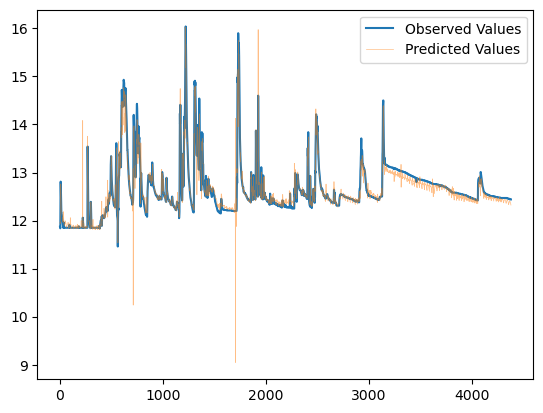

In [68]:
plot_graph(sto_nino_true, lstm_s_pred_s)

In [33]:
nse_s_s = calc_nse(sto_nino_true, lstm_s_pred_s)
nse_s_s

0.9299758957645782

In [34]:
mse_s_s = calc_mse(sto_nino_true, lstm_s_pred_s)
mse_s_s

0.02173707611732991

Test Sto Nino model on Montalban data

In [35]:
lstm_s_pred_m = get_predictions(lstm_sto_nino, montalban_window.test)
lstm_s_pred_m

array([17.963825, 17.962914, 17.955044, ..., 18.94535 , 18.92538 ,
       18.898174], dtype=float32)

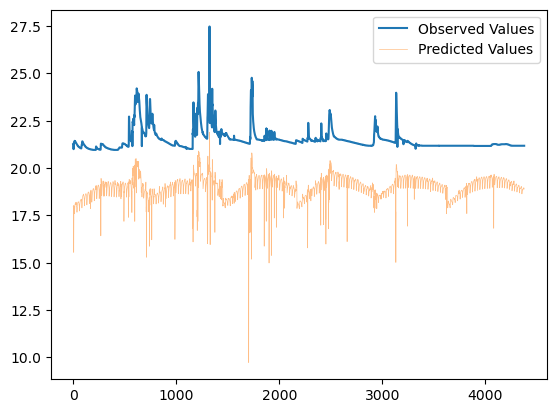

In [69]:
plot_graph(montalban_true, lstm_s_pred_m)

In [36]:
nse_s_m = calc_nse(montalban_true, lstm_s_pred_m)
nse_s_m

-20.57024233019205

In [37]:
mse_s_m = calc_mse(montalban_true, lstm_s_pred_m)
mse_s_m

6.560382145055992

Test Montalban model on Montalban data

In [38]:
lstm_m_pred_m = get_predictions(lstm_montalban, montalban_window.test)
lstm_m_pred_m

array([21.056297, 21.074781, 21.090872, ..., 21.464645, 21.45942 ,
       21.447365], dtype=float32)

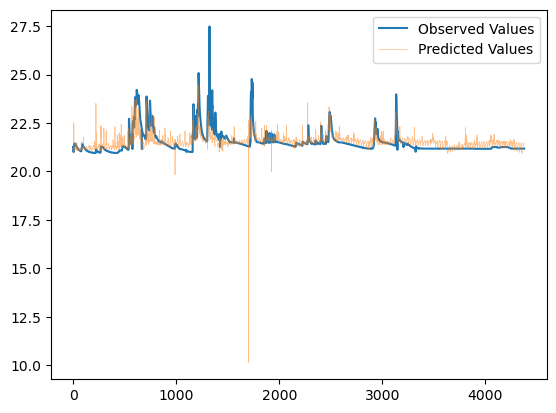

In [70]:
plot_graph(montalban_true, lstm_m_pred_m)

In [39]:
nse_m_m = calc_nse(montalban_true, lstm_m_pred_m)
nse_m_m

0.3103978681325559

In [40]:
mse_m_m = calc_mse(montalban_true, lstm_m_pred_m)
mse_m_m

0.209735868695521

Test Montalban model on Sto Nino data

In [41]:
lstm_m_pred_s = get_predictions(lstm_montalban, sto_nino_window.test)
lstm_m_pred_s

array([17.63443 , 17.672918, 17.699615, ..., 18.176064, 18.187626,
       18.189415], dtype=float32)

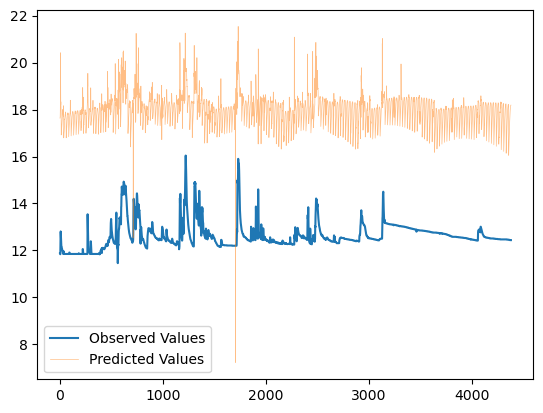

In [71]:
plot_graph(sto_nino_true, lstm_m_pred_s)

In [42]:
nse_m_s = calc_nse(sto_nino_true, lstm_m_pred_s)
nse_m_s

-91.92564969363254

In [43]:
mse_m_m = calc_mse(sto_nino_true, lstm_m_pred_s)
mse_m_m

28.84623720214673

## Ensemble

In [44]:
sto_nino_weights = lstm_sto_nino.get_weights()
sto_nino_weights

[array([[-0.01225222,  0.1373684 , -0.19578077, ...,  0.11738302,
         -0.11132029,  0.19060606],
        [-0.02861495, -0.1633032 , -0.00466913, ..., -0.01229357,
         -0.04390412, -0.00683664],
        [-0.01118321,  0.05687966,  0.07160736, ...,  0.06373163,
          0.04518367, -0.021033  ],
        ...,
        [-0.05413439,  0.06652366, -0.12337251, ...,  0.14185297,
         -0.11077998,  0.1504351 ],
        [-0.03986382, -0.04217922,  0.16996934, ..., -0.0394491 ,
          0.19076657,  0.14690971],
        [-0.07235436,  0.0388865 , -0.14996405, ..., -0.01349465,
         -0.13732415,  0.01317394]], dtype=float32),
 array([[-0.08270359, -0.01012988, -0.03722806, ...,  0.02721502,
         -0.07229397,  0.13311005],
        [-0.11853749,  0.02347434,  0.02121752, ...,  0.0452819 ,
         -0.00044734, -0.18456843],
        [ 0.07479998,  0.00312768, -0.02558553, ..., -0.09851068,
          0.08165195,  0.06285585],
        ...,
        [ 0.05106577,  0.01557032, -0.0

In [45]:
montalban_weights = lstm_montalban.get_weights()
montalban_weights

[array([[ 0.00148509,  0.19283634, -0.1653328 , ...,  0.1296502 ,
         -0.10722363,  0.17329279],
        [-0.04898791, -0.08457127,  0.02465832, ..., -0.00979912,
         -0.03833546, -0.01946656],
        [-0.05926542,  0.11232674,  0.09804596, ...,  0.06178136,
          0.00228567, -0.0103131 ],
        ...,
        [-0.06826037,  0.09023979, -0.1110157 , ...,  0.19375168,
         -0.06813542,  0.15640837],
        [ 0.02328608, -0.03238164,  0.14512147, ...,  0.0031148 ,
          0.08757231,  0.16067965],
        [-0.07059795,  0.12214294, -0.11945487, ..., -0.01670079,
         -0.15219231, -0.00295029]], dtype=float32),
 array([[-0.08270359, -0.01012988, -0.03722806, ...,  0.02721502,
         -0.07229397,  0.13311005],
        [-0.11853749,  0.02347434,  0.02121752, ...,  0.0452819 ,
         -0.00044734, -0.18456843],
        [ 0.07479998,  0.00312768, -0.02558553, ..., -0.09851068,
          0.08165195,  0.06285585],
        ...,
        [ 0.05106577,  0.01557032, -0.0

In [50]:
n = len(sto_nino_weights)
n

9

In [51]:
ensemble_weights = []

for i in range(n):
    ensemble_weights.append((sto_nino_weights[i]+montalban_weights[i])/2)
    
ensemble_weights

[array([[-0.00538356,  0.16510236, -0.18055677, ...,  0.12351661,
         -0.10927196,  0.18194942],
        [-0.03880143, -0.12393723,  0.0099946 , ..., -0.01104634,
         -0.04111979, -0.0131516 ],
        [-0.03522431,  0.08460321,  0.08482666, ...,  0.06275649,
          0.02373467, -0.01567305],
        ...,
        [-0.06119738,  0.07838172, -0.1171941 , ...,  0.16780233,
         -0.0894577 ,  0.15342173],
        [-0.00828887, -0.03728043,  0.1575454 , ..., -0.01816715,
          0.13916944,  0.15379468],
        [-0.07147616,  0.08051472, -0.13470946, ..., -0.01509772,
         -0.14475822,  0.00511183]], dtype=float32),
 array([[-0.08270359, -0.01012988, -0.03722806, ...,  0.02721502,
         -0.07229397,  0.13311005],
        [-0.11853749,  0.02347434,  0.02121752, ...,  0.0452819 ,
         -0.00044734, -0.18456843],
        [ 0.07479998,  0.00312768, -0.02558553, ..., -0.09851068,
          0.08165195,  0.06285585],
        ...,
        [ 0.05106577,  0.01557032, -0.0

In [53]:
lstm.set_weights(ensemble_weights)

### Test Ensemble Model

In [57]:
ensemble_pred_s = get_predictions(lstm, sto_nino_window.test)
ensemble_pred_s

array([13.098021 , 13.046892 , 12.9965105, ..., 12.412022 , 12.384045 ,
       12.349719 ], dtype=float32)

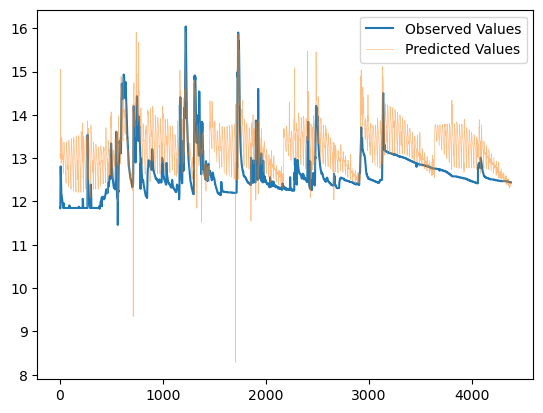

In [66]:
plot_graph(sto_nino_true, ensemble_pred_s)

In [58]:
nse_ensemble_s = calc_nse(sto_nino_true, ensemble_pred_s)
nse_ensemble_s

-1.169520911379081

In [59]:
mse_ensemble_s = calc_mse(sto_nino_true, ensemble_pred_s)
mse_ensemble_s

0.6734686820160787

In [60]:
ensemble_pred_m = get_predictions(lstm, montalban_window.test)
ensemble_pred_m

array([16.6405  , 16.617352, 16.585598, ..., 16.353758, 16.326435,
       16.29847 ], dtype=float32)

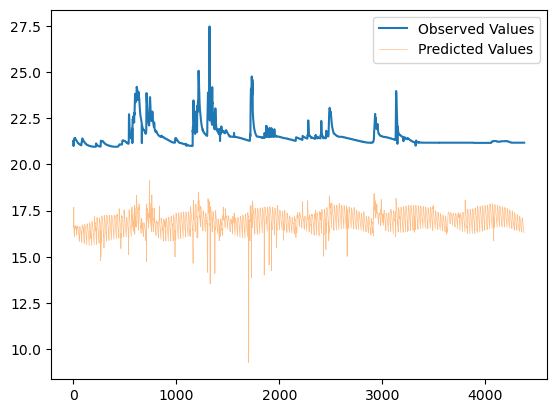

In [67]:
plot_graphs(montalban_true, ensemble_pred_m)

In [61]:
nse_ensemble_m = calc_nse(montalban_true, ensemble_pred_m)
nse_ensemble_m

-67.98174218957043

In [62]:
mse_ensemble_m = calc_mse(montalban_true, ensemble_pred_m)
mse_ensemble_m

20.980134709097833